# Loan Approval Prediction

**Task 4 – Elevvo ML Internship**  
Binary classification on loan approval data, handling imbalance with SMOTE.  
Models: Logistic Regression & Decision Tree  

## 1. Load Required Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Load Dataset

In [88]:
df_path = '../data/loan_data.csv'
df = pd.read_csv(df_path)
df.drop(columns='Property_Area', axis=1, inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


## 3. Data Exploration

In [89]:
df.info()
df.describe()
print("Missing values per column:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed

## 4. Preprocessing

In [90]:
# Fill missing categorical values with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# Fill missing numerical values
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

### 4.1 Target Balance Visualization

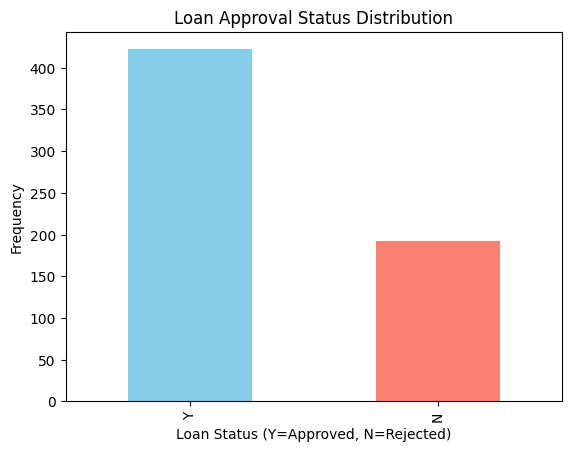

In [91]:
df['Loan_Status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Status (Y=Approved, N=Rejected)')
plt.ylabel('Frequency')
plt.savefig('../visuals/loan_status_distribution.png', dpi=300)
plt.show()

### 4.2 Encode & Scale Features

In [92]:
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed'], drop_first=True)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

scaler = StandardScaler()
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[num_cols] = scaler.fit_transform(df[num_cols])

## 5. Train/Test Split

In [93]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1).copy()
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 6. Model 1: Logistic Regression (No SMOTE)

Logistic Regression (No SMOTE)
Accuracy: 0.8617886178861789
Precision: 0.84
Recall: 0.9882352941176471
F1 Score: 0.9081081081081082


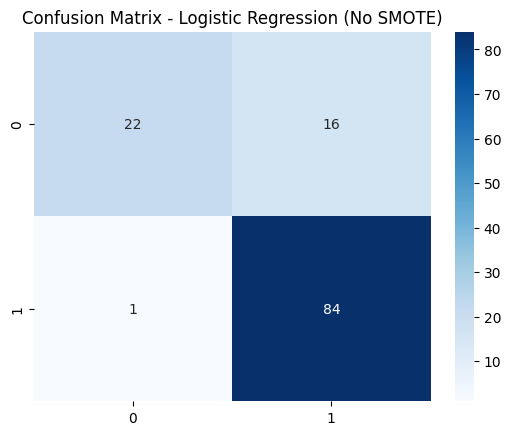

In [94]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(X_train, y_train)

y_pred_lr = clf_lr.predict(X_test)

print("Logistic Regression (No SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (No SMOTE)')
plt.savefig('../visuals/confusion_matrix_logreg_no_smote.png', dpi=300)
plt.show()

## 7. Model 2: Decision Tree (No SMOTE)

Decision Tree (No SMOTE)
Accuracy: 0.7479674796747967
Precision: 0.8214285714285714
Recall: 0.8117647058823529
F1 Score: 0.8165680473372781


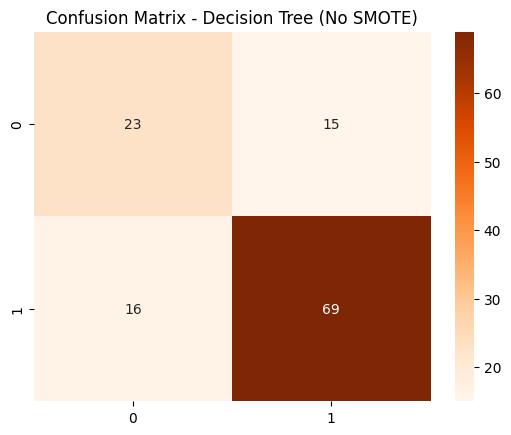

In [95]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)

print("Decision Tree (No SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Decision Tree (No SMOTE)')
plt.savefig('../visuals/confusion_matrix_dcitree_no_smote.png', dpi=300)
plt.show()

## 8. Bonus: Handle Class Imbalance with SMOTE

In [96]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: Loan_Status
1    337
0    154
Name: count, dtype: int64
After SMOTE: Loan_Status
1    337
0    337
Name: count, dtype: int64


### 8.1 Logistic Regression with SMOTE

Logistic Regression (With SMOTE)
Accuracy: 0.8373983739837398
Precision: 0.8350515463917526
Recall: 0.9529411764705882
F1 Score: 0.8901098901098901


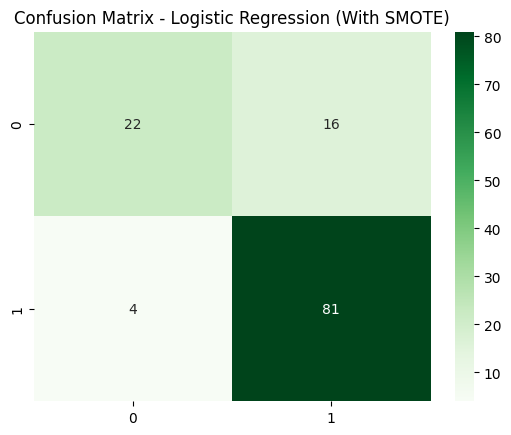

In [97]:
clf_lr_sm = LogisticRegression(max_iter=1000)
clf_lr_sm.fit(X_train_sm, y_train_sm)

y_pred_lr_sm = clf_lr_sm.predict(X_test)

print("Logistic Regression (With SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_sm))
print("Precision:", precision_score(y_test, y_pred_lr_sm))
print("Recall:", recall_score(y_test, y_pred_lr_sm))
print("F1 Score:", f1_score(y_test, y_pred_lr_sm))

cm_lr_sm = confusion_matrix(y_test, y_pred_lr_sm)
sns.heatmap(cm_lr_sm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression (With SMOTE)')
plt.savefig('../visuals/confusion_matrix_logreg_with_smote.png', dpi=300)
plt.show()

### 8.2 Decision Tree with SMOTE

Decision Tree (With SMOTE)
Accuracy: 0.7398373983739838
Precision: 0.8441558441558441
Recall: 0.7647058823529411
F1 Score: 0.8024691358024691


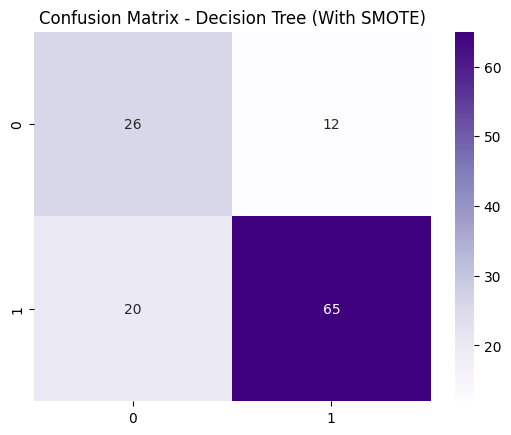

In [98]:
clf_dt_sm = DecisionTreeClassifier(random_state=42)
clf_dt_sm.fit(X_train_sm, y_train_sm)

y_pred_dt_sm = clf_dt_sm.predict(X_test)

print("Decision Tree (With SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_sm))
print("Precision:", precision_score(y_test, y_pred_dt_sm))
print("Recall:", recall_score(y_test, y_pred_dt_sm))
print("F1 Score:", f1_score(y_test, y_pred_dt_sm))

cm_dt_sm = confusion_matrix(y_test, y_pred_dt_sm)
sns.heatmap(cm_dt_sm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Decision Tree (With SMOTE)')
plt.savefig('../visuals/confusion_matrix_dcitree_with_smote.png', dpi=300)
plt.show()

## 9. Visual Comparison of Model Performance

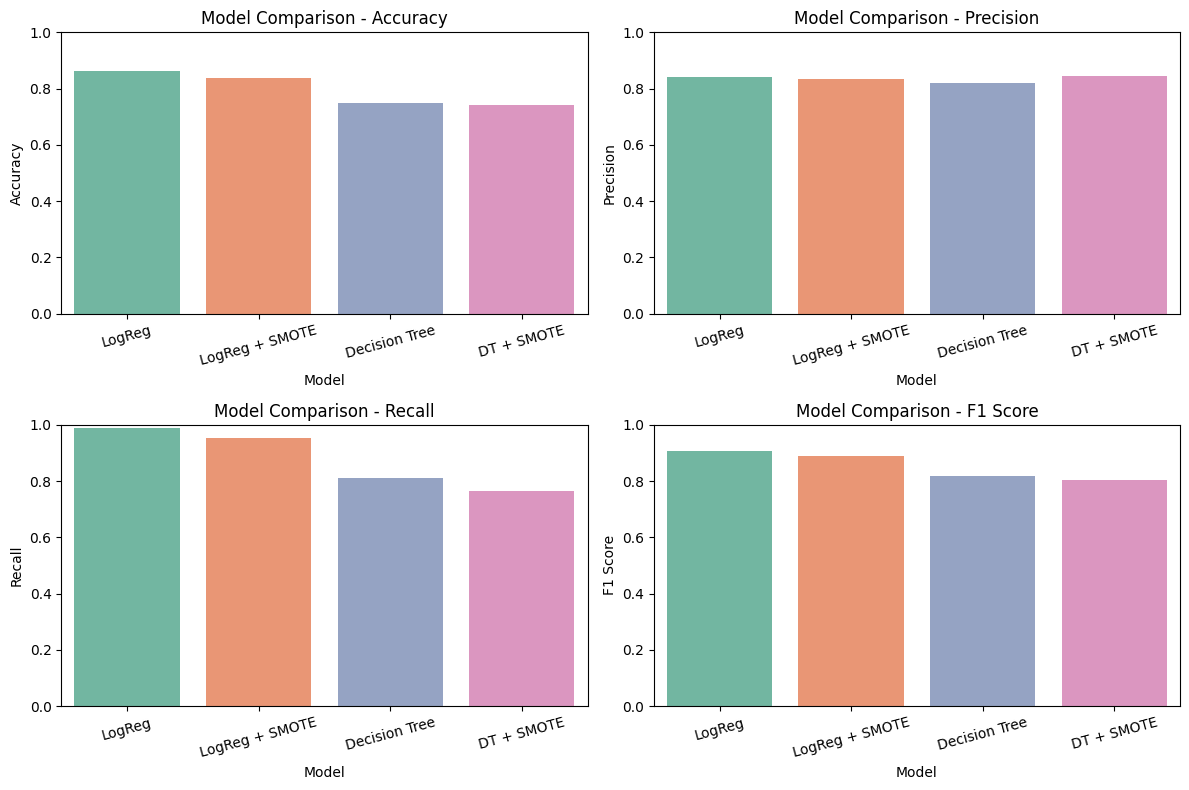

In [99]:
results = {
    "Model": ["LogReg", "LogReg + SMOTE", "Decision Tree", "DT + SMOTE"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_lr_sm),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_dt_sm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr_sm),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt_sm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr_sm),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt_sm)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr_sm),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt_sm)
    ]
}

results_df = pd.DataFrame(results)

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=results_df, x="Model", y=metric, palette='Set2')
    plt.title(f'Model Comparison - {metric}')
    plt.ylim(0, 1)
    plt.xticks(rotation=15)

plt.tight_layout()
plt.savefig('../visuals/modeles_comparison.png', dpi=300)
plt.show()